In [1]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import cross_validation, metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn import metrics

C:\Users\Swea\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Swea\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
df = pd.read_csv('airdata.csv',encoding = "ISO-8859-1") 

C:\Users\Swea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [34]:
df.dropna(how="all",axis=1,inplace=True)

In [35]:
df.dropna(how="all",axis=0,inplace=True)

In [36]:
df.shape

(9357, 13)

In [38]:
df.tail()

,so2,no2,rspm,spm,pm2_5,stn_code,sampling_date,state,location,agency,type,location_monitoring_station,date
9352,6.8,20.5,66,186,0,,12/11/2009,Andhra Pradesh,Hyderabad,,Residential and others,ABIDS Circle,2009-11-12
9353,3.8,25.5,92,206,0,,14/12/2009,Andhra Pradesh,Hyderabad,,Residential and others,ABIDS Circle,2009-12-14
9354,3.5,14.8,49,138,0,,16/12/2009,Andhra Pradesh,Hyderabad,,Residential and others,ABIDS Circle,2009-12-16
9355,5.5,38,73,131,0,,20/12/2009,Andhra Pradesh,Hyderabad,,Residential and others,ABIDS Circle,2009-12-20
9356,5.3,22,57,168,0,,23/12/2009,Andhra Pradesh,Hyderabad,,Residential and others,ABIDS Circle,2009-12-23


In [39]:
features=list(df.columns)

In [40]:
features.remove('stn_code')
features.remove('state')
features.remove('sampling_date')
features.remove('agency')
features.remove('type')
features.remove('location')
features.remove('location_monitoring_station')
features.remove('date')

In [41]:
X = df[features]
y = df['so2']

In [42]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.4, random_state=0)

In [43]:
print(X_train.shape, y_train.shape)

(5614, 5) (5614,)


In [44]:
numerics =['float64']
cat=['object']

df_num=df.select_dtypes(include=numerics)
df_cat=df.select_dtypes(include=cat)

In [45]:
df_num =df_num.fillna('0')

In [46]:
df_cat=df_cat.fillna('') 

In [47]:
df=pd.concat([df_num, df_cat],1)

In [48]:
df.head()

,so2,no2,rspm,spm,pm2_5,stn_code,sampling_date,state,location,agency,type,location_monitoring_station,date
0,4.8,17.4,0,0,0,150,February - M021990,Andhra Pradesh,Hyderabad,,"Residential, Rural and other Areas",,1990-02-01
1,3.1,7,0,0,0,151,February - M021990,Andhra Pradesh,Hyderabad,,Industrial Area,,1990-02-01
2,6.2,28.5,0,0,0,152,February - M021990,Andhra Pradesh,Hyderabad,,"Residential, Rural and other Areas",,1990-02-01
3,6.3,14.7,0,0,0,150,March - M031990,Andhra Pradesh,Hyderabad,,"Residential, Rural and other Areas",,1990-03-01
4,4.7,7.5,0,0,0,151,March - M031990,Andhra Pradesh,Hyderabad,,Industrial Area,,1990-03-01


In [49]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.510, test: 2.689
R^2 train: 0.956, test: 0.937


In [50]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.006, test: 0.837
R^2 train: 1.000, test: 0.981


In [51]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 1.0


In [52]:
scores = cross_val_score(regressor, X, y, cv=5)
print ("Average of scores: ", scores.mean())
print ("Cross validation scores: ", scores)

Average of scores:  1.0
Cross validation scores:  [1. 1. 1. 1. 1.]


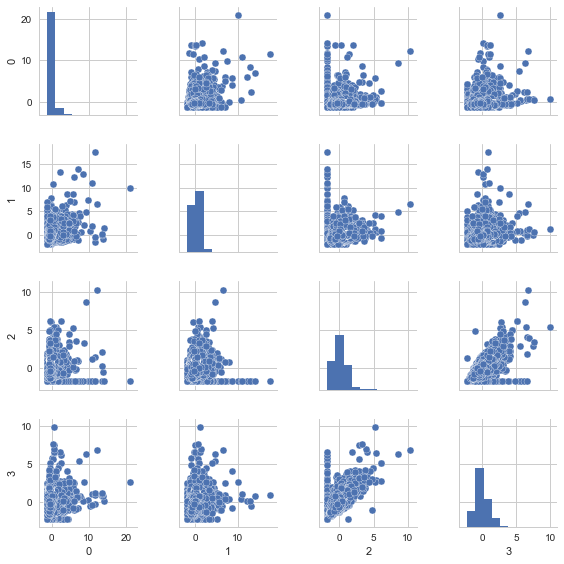

In [116]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['so2', 'no2', 'rspm', 'spm']

data_to_plot = df[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.show()